In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import pandas as pd

In [3]:
cwd = os.getcwd()
DATADIR = os.path.join(cwd,'coupled pendula data')

TWELVECM = os.path.join(DATADIR, '12_5cm')
TWENTYFIVECM = os.path.join(DATADIR, '25cm')
FORTYCM = os.path.join(DATADIR, '40cm')
FIFTYCM = os.path.join(DATADIR, '50cm')
SEVENTYFIVECM = os.path.join(DATADIR, '75cm')

FOURIER = os.path.join(DATADIR, 'Fourier')

TWELVECMF = os.path.join(FOURIER, '12_5cmf')
TWENTYFIVECMF = os.path.join(FOURIER, '25cmf')
FORTYCMF = os.path.join(FOURIER, '40cmf')
FIFTYCMF = os.path.join(FOURIER, '50cmf')
SEVENTYFIVECMF = os.path.join(FOURIER, '75cmf')

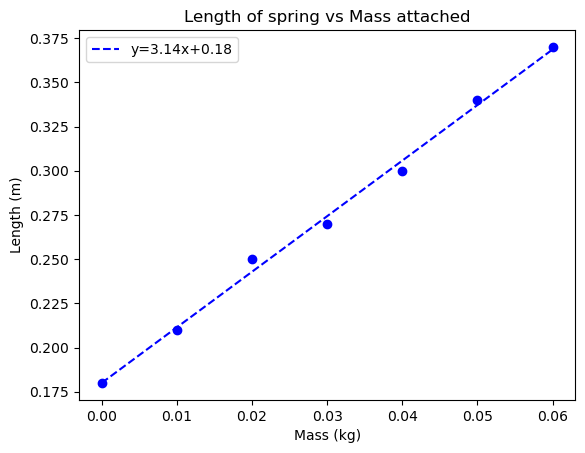

[0.498487916486281, 0.5009600644264314, 0.508304373335541, 0.5232504405540378, 0.5366774964162815, 0.5808944831083059]


In [4]:
#k Calculation
g = 9.81
L = 1
M = 1.1
l = [0, 0.125, 0.25, 0.4, 0.5, 0.75]

x = np.array([0.18, 0.21, 0.25, 0.27, 0.30, 0.34, 0.37])
m = np.array([0, 0.010, 0.020, 0.030, 0.040, 0.050, 0.060])

xp = np.linspace(min(m),max(m),100)

plt.plot(m,x,'bo')

c = np.polyfit(m,x,1)
p = np.poly1d(c)

plt.plot(xp,p(xp),'--b',label=f'y={round(c[0],2)}x+{round(c[1],2)}')
plt.legend(loc="upper left")
plt.title("Length of spring vs Mass attached")
plt.xlabel("Mass (kg)")
plt.ylabel("Length (m)")
plt.savefig("kcalc.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

k = g/c[0]

#A and B calculation
A = math.sqrt(g/L)
B = [i*math.sqrt(k) for i in l]
omega = [math.sqrt(A**2+2*i**2) for i in B]
f = [i/(2*math.pi) for i in omega]
print(f)

#systematic uncertainty calculation
SYSERR = math.sqrt((0.1/M)**2+0.02**2)

        Time (s)   Voltage 0 (V)  Voltage 1 (V)   Scan rate used is 235 Hz
0       0.000000       -0.173340      -0.156250                        NaN
1       0.004256       -0.173828      -0.157715                        NaN
2       0.008511       -0.174316      -0.158691                        NaN
3       0.012767       -0.175781      -0.158691                        NaN
4       0.017022       -0.175781      -0.159668                        NaN
...          ...             ...            ...                        ...
18939  80.595744       -0.006348       0.047363                        NaN
18940  80.599999       -0.008301       0.044922                        NaN
18941  80.604255       -0.009277       0.043945                        NaN
18942  80.608510       -0.011230       0.041504                        NaN
18943  80.612766       -0.013672       0.040527                        NaN

[18944 rows x 4 columns]


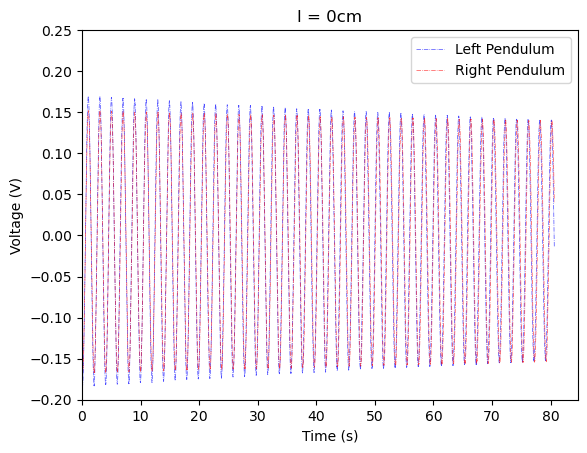

In [5]:
#UNCOUPLED IN PHASE
INPHASE = os.path.join(DATADIR, 'uncoupled pendula in phase.csv')
df = pd.read_csv(INPHASE)

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')
plt.title('l = 0cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.xlim(0,)
plt.ylim(-0.2, 0.25)
plt.savefig("inphase1.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()
    

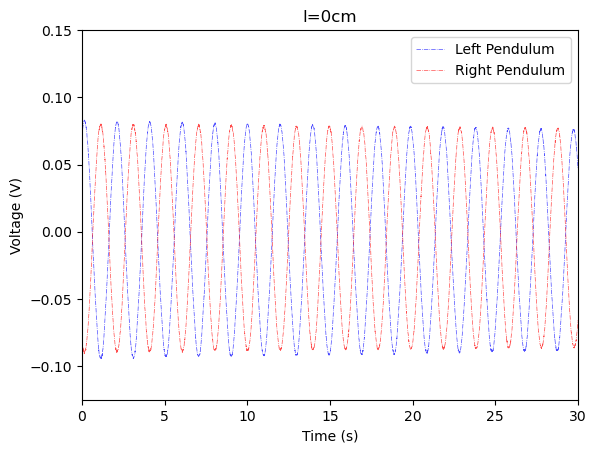

In [6]:
#UNCOUPLED OUT OF PHASE
OUTOFPHASE = os.path.join(DATADIR, 'uncoupled out of phase.csv')

df = pd.read_csv(OUTOFPHASE)

plt.plot(df['Time (s)'], df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',label='Left Pendulum',linestyle='-.')
plt.plot(df['Time (s)'], df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',label = 'Right Pendulum',linestyle='-.')
plt.title('l=0cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.xlim(0,30)
plt.ylim(-0.125, 0.15)
plt.savefig("outphase1.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

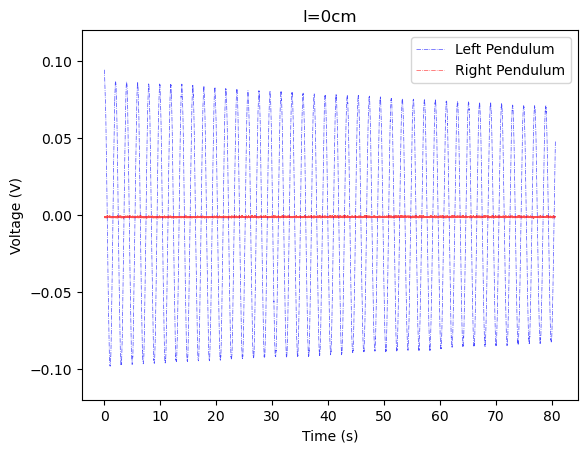

In [7]:
#UNCOUPLED BEATMODE
BEATMODE = os.path.join(DATADIR, 'uncoupled beatmode (single pendula).csv')

df = pd.read_csv(BEATMODE)

plt.plot(df['Time (s)'], df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',label='Left Pendulum',linestyle='-.')
plt.plot(df['Time (s)'], df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',label='Right Pendulum',linestyle='-.')
plt.title('l=0cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.12, 0.12)
plt.savefig("bmphase1.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

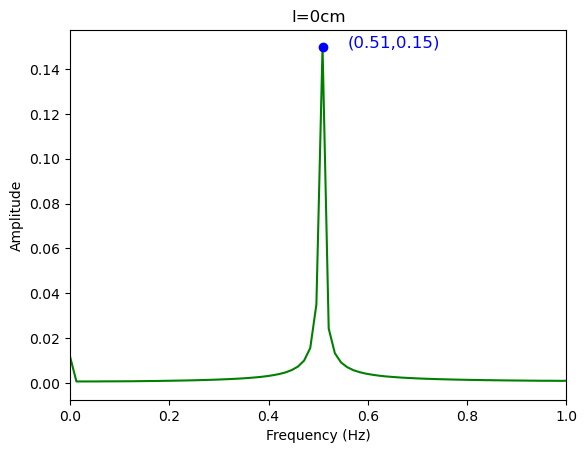

In [8]:
#UNCOUPLED IN PHASE FOURIER
INPHASEF = os.path.join(FOURIER, 'uncoupled pendula in phase fourier.csv')

df = pd.read_csv(INPHASEF)

plt.plot(df['Frequency (Hz)'], df['Amplitude'],color='green')
plt.xlim(0,1)
plt.plot(df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0],df['Amplitude'].max(),'bo')
plt.annotate(f'({df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0]:.2f},{df['Amplitude'].max():.2f})',
                 xy=(df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0], df['Amplitude'].max()),
                 xytext=(df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0]+0.05, df['Amplitude'].max()),
                 fontsize=12, color='blue')

plt.title('l=0cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.savefig("inphase1f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

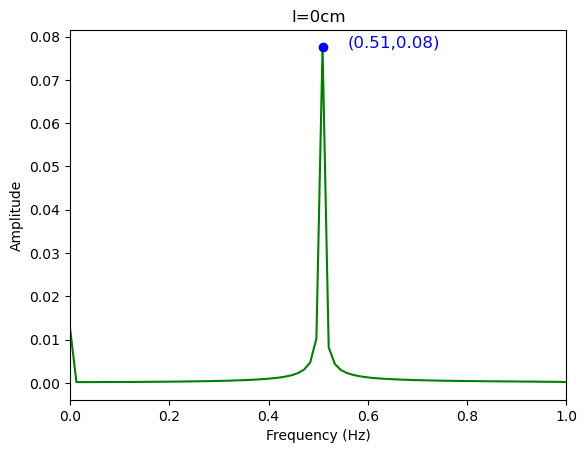

In [9]:
#UNCOUPLED OUT OF PHASE FOURIER
OUTOFPHASEF = os.path.join(FOURIER, 'uncoupled out of phase fourier.csv')

df = pd.read_csv(OUTOFPHASEF)

plt.plot(df['Frequency (Hz)'], df['Amplitude'],color='green')
plt.xlim(0,1)
plt.plot(df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0],df['Amplitude'].max(),'bo')
plt.annotate(f'({df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0]:.2f},{df['Amplitude'].max():.2f})',
                 xy=(df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0], df['Amplitude'].max()),
                 xytext=(df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0]+0.05, df['Amplitude'].max()),
                 fontsize=12, color='blue')

plt.title('l=0cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.savefig("outphase1f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

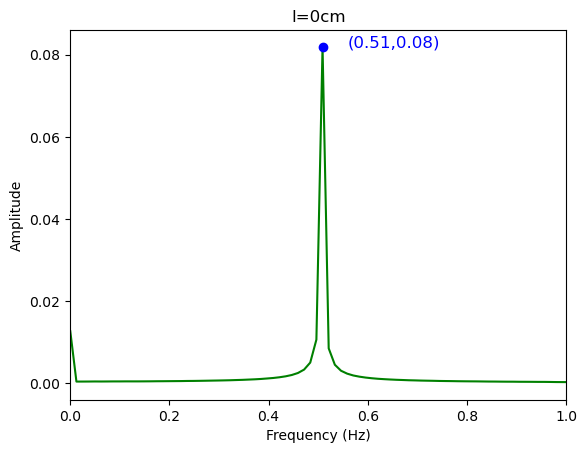

In [10]:
#UNCOUPLED BEATMODE FOURIER
BEATMODEF = os.path.join(FOURIER, 'uncoupled pendula beatmode (single pendula) fourier.csv')
df = pd.read_csv(BEATMODEF)

plt.plot(df['Frequency (Hz)'], df['Amplitude'],'g')
plt.xlim(0,1)
plt.plot(df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0],df['Amplitude'].max(),'bo')
plt.annotate(f'({df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0]:.2f},{df['Amplitude'].max():.2f})',
                 xy=(df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0], df['Amplitude'].max()),
                 xytext=(df[df['Amplitude']==df['Amplitude'].max()]['Frequency (Hz)'].values[0]+0.05, df['Amplitude'].max()),
                 fontsize=12, color='blue')

plt.title('l=0cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.savefig("bmphase1f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

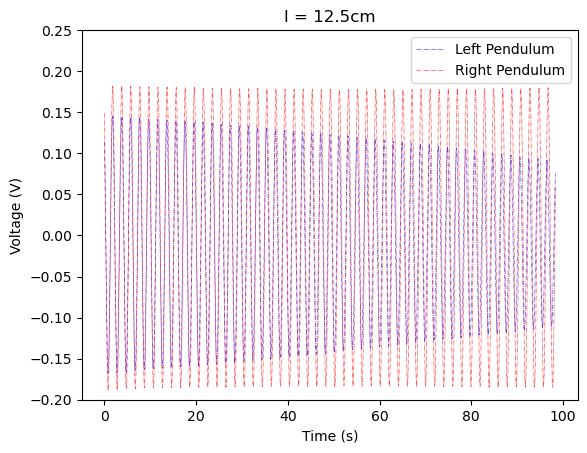

In [11]:
#12_5CM IN PHASE
DATA1 = os.path.join(TWELVECM,'coupled pendula in phase 1.csv')
DATA2 = os.path.join(TWELVECM,'coupled pendula in phase 2.csv')
DATA3 = os.path.join(TWELVECM,'coupled pendula in phase 3.csv')
DATA4 = os.path.join(TWELVECM,'coupled pendula in phase 4.csv')
DATA5 = os.path.join(TWELVECM,'coupled pendula in phase 5.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)
df4 = pd.read_csv(DATA4)
df5 = pd.read_csv(DATA5)

df = df5

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l = 12.5cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.2, 0.25)
plt.savefig("inphase2.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



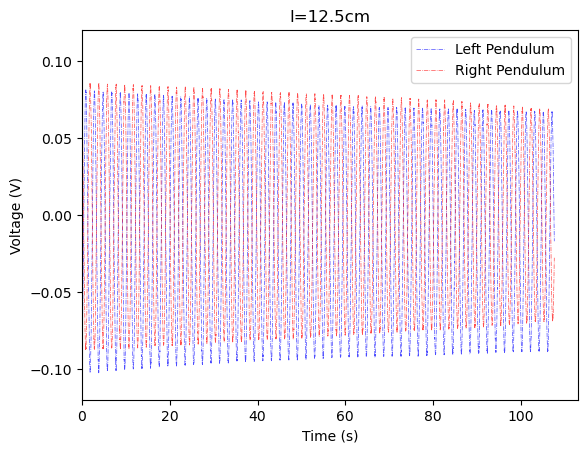

In [12]:
#12_5CM OUT OF PHASE

DATA1 = os.path.join(TWELVECM,'coupled pendula out of phase 1.csv')
DATA2 = os.path.join(TWELVECM,'coupled pendula out of phase 2.csv')
DATA3 = os.path.join(TWELVECM,'coupled pendula out of phase 3.csv')
DATA4 = os.path.join(TWELVECM,'coupled pendula out of phase 4.csv')
DATA5 = os.path.join(TWELVECM,'coupled pendula out of phase 5.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)
df4 = pd.read_csv(DATA4)
df5 = pd.read_csv(DATA5)

df = df1

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l=12.5cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.xlim(0,)
plt.ylim(-0.12, 0.12)
plt.savefig("outphase2.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()




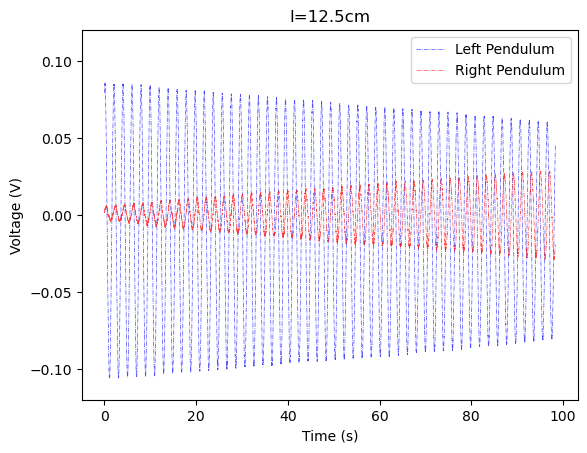

In [13]:
#12_5CM BEATMODE

DATA1 = os.path.join(TWELVECM,'coupled pendula beatmode 1.csv')
DATA2 = os.path.join(TWELVECM,'coupled pendula beatmode 2.csv')
DATA3 = os.path.join(TWELVECM,'coupled pendula beatmode 3.csv')
DATA4 = os.path.join(TWELVECM,'coupled pendula beatmode 4.csv')
DATA5 = os.path.join(TWELVECM,'coupled pendula beatmode 5.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)
df4 = pd.read_csv(DATA4)
df5 = pd.read_csv(DATA5)

df = df1

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l=12.5cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.12, 0.12)
plt.savefig("bmphase2.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



0.009548105334171853


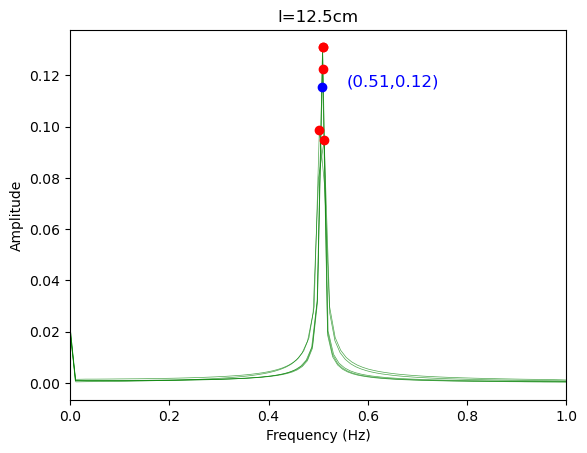

In [14]:
#12_5CMF IN PHASE

DATA1 = os.path.join(TWELVECMF,'coupled pendula in phase 1 fourier.csv')
DATA2 = os.path.join(TWELVECMF,'coupled pendula in phase 2 fourier.csv')
DATA3 = os.path.join(TWELVECMF,'coupled pendula in phase 3 fourier.csv')
DATA4 = os.path.join(TWELVECMF,'coupled pendula in phase 4 fourier.csv')
DATA5 = os.path.join(TWELVECMF,'coupled pendula in phase 5 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)
df4 = pd.read_csv(DATA4)
df5 = pd.read_csv(DATA5)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()
maxa4 = df4['Amplitude'].max()
maxa5 = df5['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3, maxa4, maxa5]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf4 = df4[df4['Amplitude']==df4['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf5 = df5[df5['Amplitude']==df5['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3, maxf4, maxf5]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg
print(deltap)

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df4['Frequency (Hz)'],df4['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df5['Frequency (Hz)'],df5['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(maxf4,maxa4,'ro')
plt.plot(maxf5,maxa5,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.title('l=12.5cm')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.xlim(0,1)
plt.savefig("inphase2f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



0.00808966971482902


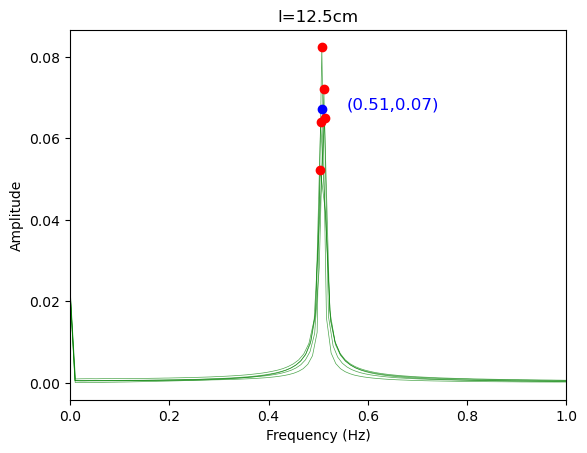

In [15]:
#12_5CMF OUT OF PHASE

DATA1 = os.path.join(TWELVECMF,'coupled pendula out of phase 1 fourier.csv')
DATA2 = os.path.join(TWELVECMF,'coupled pendula out of phase 2 fourier.csv')
DATA3 = os.path.join(TWELVECMF,'coupled pendula out of phase 3 fourier.csv')
DATA4 = os.path.join(TWELVECMF,'coupled pendula out of phase 4 fourier.csv')
DATA5 = os.path.join(TWELVECMF,'coupled pendula out of phase 5 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)
df4 = pd.read_csv(DATA4)
df5 = pd.read_csv(DATA5)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()
maxa4 = df4['Amplitude'].max()
maxa5 = df5['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3, maxa4, maxa5]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf4 = df4[df4['Amplitude']==df4['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf5 = df5[df5['Amplitude']==df5['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3, maxf4, maxf5]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg
print(deltap)

plt.title('l=12.5cm')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df4['Frequency (Hz)'],df4['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df5['Frequency (Hz)'],df5['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(maxf4,maxa4,'ro')
plt.plot(maxf5,maxa5,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("outphase2f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()





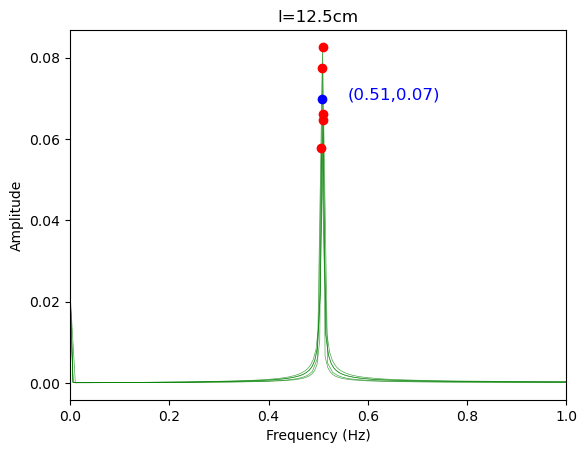

In [16]:
#12_5CMF BEATMODE

DATA1 = os.path.join(TWELVECMF,'coupled pendula beatmode 1 fourier.csv')
DATA2 = os.path.join(TWELVECMF,'coupled pendula beatmode 2 fourier.csv')
DATA3 = os.path.join(TWELVECMF,'coupled pendula beatmode 3 fourier.csv')
DATA4 = os.path.join(TWELVECMF,'coupled pendula beatmode 4 fourier.csv')
DATA5 = os.path.join(TWELVECMF,'coupled pendula beatmode 5 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)
df4 = pd.read_csv(DATA4)
df5 = pd.read_csv(DATA5)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()
maxa4 = df4['Amplitude'].max()
maxa5 = df5['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3, maxa4, maxa5]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf4 = df4[df4['Amplitude']==df4['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf5 = df5[df5['Amplitude']==df5['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3, maxf4, maxf5]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg

plt.title('l=12.5cm')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df4['Frequency (Hz)'],df4['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df5['Frequency (Hz)'],df5['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(maxf4,maxa4,'ro')
plt.plot(maxf5,maxa5,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("bmphase2f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



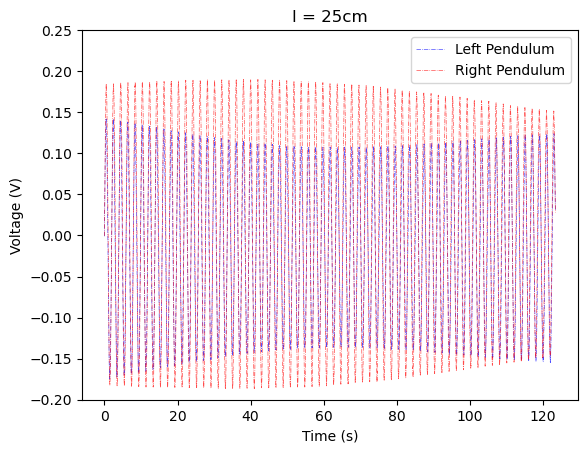

In [17]:
#25CM IN PHASE
DATA1 = os.path.join(TWENTYFIVECM,'coupled pendula in phase 1.csv')
DATA2 = os.path.join(TWENTYFIVECM,'coupled pendula in phase 2.csv')
DATA3 = os.path.join(TWENTYFIVECM,'coupled pendula in phase 3.csv')
DATA4 = os.path.join(TWENTYFIVECM,'coupled pendula in phase 4.csv')
DATA5 = os.path.join(TWENTYFIVECM,'coupled pendula in phase 5.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)
df4 = pd.read_csv(DATA4)
df5 = pd.read_csv(DATA5)

df = df2

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l = 25cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.2, 0.25)
plt.savefig("inphase3.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



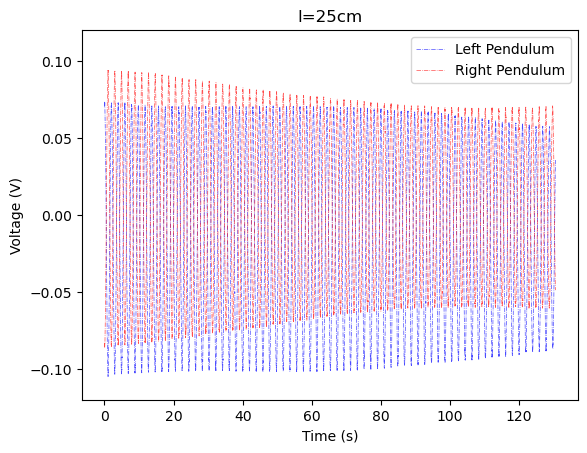

In [18]:
#25CM OUT OF PHASE

DATA1 = os.path.join(TWENTYFIVECM,'coupled pendula out of phase 1.csv')
DATA2 = os.path.join(TWENTYFIVECM,'coupled pendula out of phase 2.csv')
DATA3 = os.path.join(TWENTYFIVECM,'coupled pendula out of phase 3.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df = df1

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l=25cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.12, 0.12)
plt.savefig("outphase3.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()




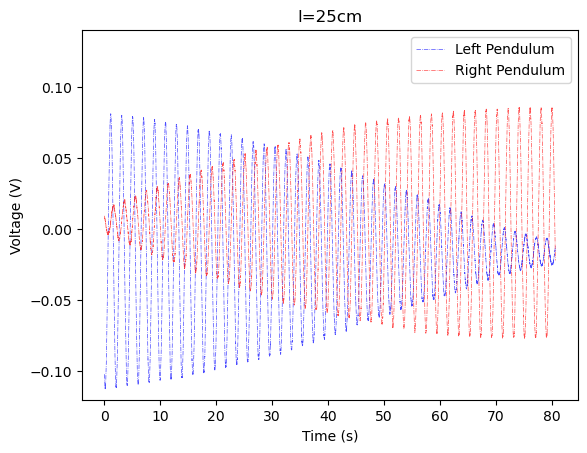

In [19]:
#25CM BEATMODE

DATA1 = os.path.join(TWENTYFIVECM,'coupled pendula beatmode 1.csv')
DATA2 = os.path.join(TWENTYFIVECM,'coupled pendula beatmode 2.csv')
DATA3 = os.path.join(TWENTYFIVECM,'coupled pendula beatmode 3.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df = df1

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l=25cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.12, 0.14)
plt.savefig("bmphase3.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



0.007603960733136662


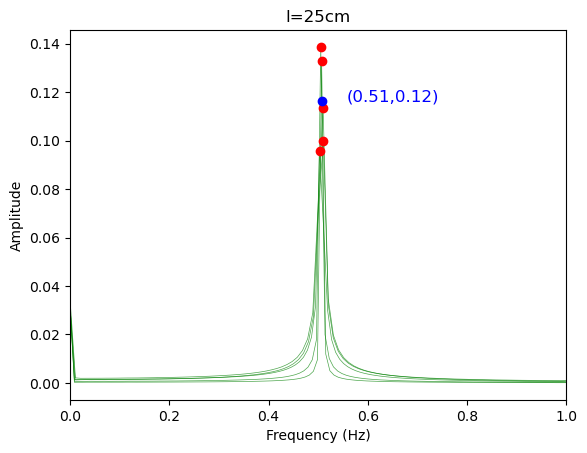

In [20]:
#25CMF IN PHASE

DATA1 = os.path.join(TWENTYFIVECMF,'coupled pendula in phase 1 fourier.csv')
DATA2 = os.path.join(TWENTYFIVECMF,'coupled pendula in phase 2 fourier.csv')
DATA3 = os.path.join(TWENTYFIVECMF,'coupled pendula in phase 3 fourier.csv')
DATA4 = os.path.join(TWENTYFIVECMF,'coupled pendula in phase 4 fourier.csv')
DATA5 = os.path.join(TWENTYFIVECMF,'coupled pendula in phase 5 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)
df4 = pd.read_csv(DATA4)
df5 = pd.read_csv(DATA5)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()
maxa4 = df4['Amplitude'].max()
maxa5 = df5['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3, maxa4, maxa5]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf4 = df4[df4['Amplitude']==df4['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf5 = df5[df5['Amplitude']==df5['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3, maxf4, maxf5]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg
print(deltap)

plt.title('l=25cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df4['Frequency (Hz)'],df4['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df5['Frequency (Hz)'],df5['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(maxf4,maxa4,'ro')
plt.plot(maxf5,maxa5,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("inphase3f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



0.003195842485802552


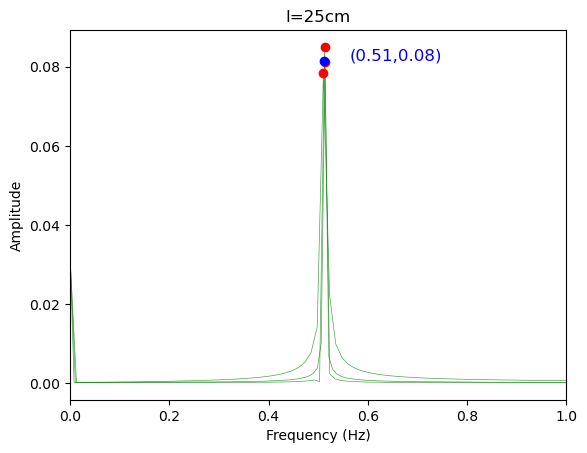

In [21]:
#25CMF OUT OF PHASE

DATA1 = os.path.join(TWENTYFIVECMF,'coupled pendula out of phase 1 fourier.csv')
DATA2 = os.path.join(TWENTYFIVECMF,'coupled pendula out of phase 2 fourier.csv')
DATA3 = os.path.join(TWENTYFIVECMF,'coupled pendula out of phase 3 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg
print(deltap)

plt.title('l=25cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("outphase3f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



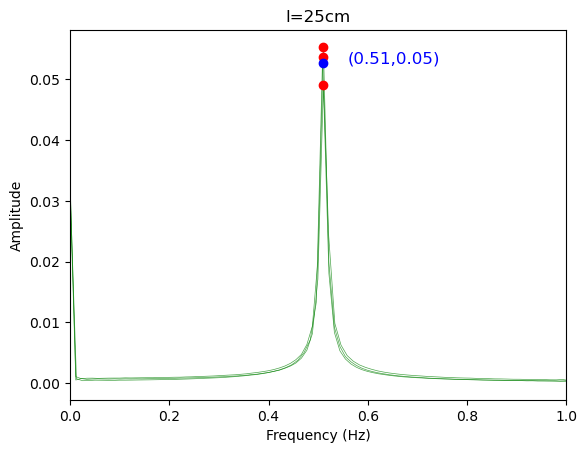

In [22]:
#25CMF BEATMODE

DATA1 = os.path.join(TWENTYFIVECMF,'coupled pendula beatmode 1 fourier.csv')
DATA2 = os.path.join(TWENTYFIVECMF,'coupled pendula beatmode 2 fourier.csv')
DATA3 = os.path.join(TWENTYFIVECMF,'coupled pendula beatmode 3 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg

plt.title('l=25cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("bmphase3f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



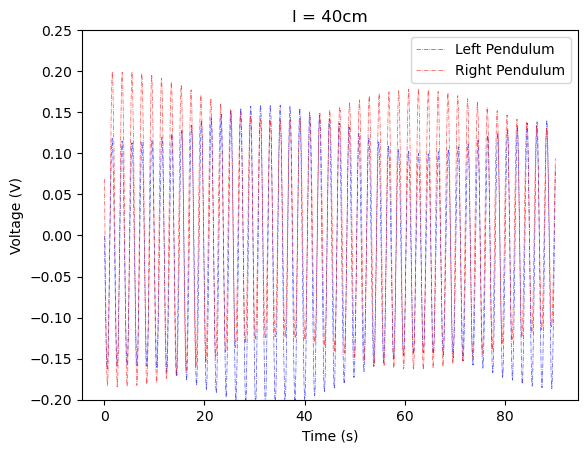

In [23]:
#40CM IN PHASE
DATA1 = os.path.join(FORTYCM,'coupled pendula in phase 1.csv')
DATA2 = os.path.join(FORTYCM,'coupled pendula in phase 2.csv')
DATA3 = os.path.join(FORTYCM,'coupled pendula in phase 3.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df = df3

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l = 40cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.2, 0.25)
plt.savefig("inphase4.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



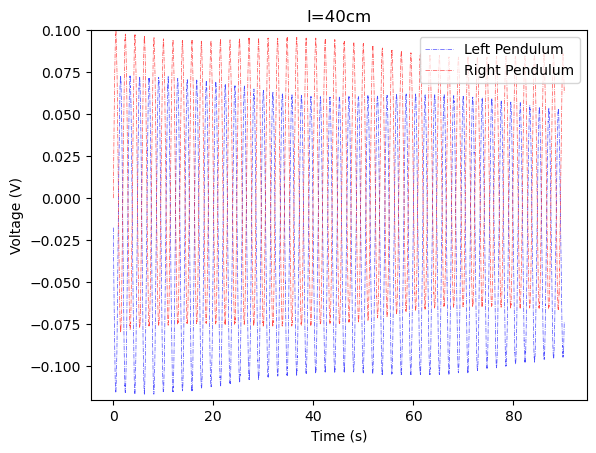

In [24]:
#40CM OUT OF PHASE
DATA1 = os.path.join(FORTYCM,'coupled pendula out of phase 1.csv')
DATA2 = os.path.join(FORTYCM,'coupled pendula out of phase 2.csv')
DATA3 = os.path.join(FORTYCM,'coupled pendula out of phase 3.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df = df3

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l=40cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.12, 0.1)
plt.savefig("outphase4.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



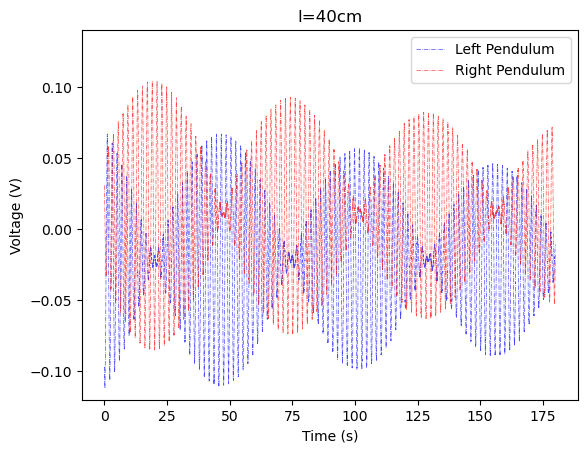

In [25]:
#40CM BEATMODE
DATA1 = os.path.join(FORTYCM,'coupled pendula beatmode 1.csv')
DATA2 = os.path.join(FORTYCM,'coupled pendula beatmode 2.csv')
DATA3 = os.path.join(FORTYCM,'coupled pendula beatmode 3.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df = df1

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l=40cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.12, 0.14)
plt.savefig("bmphase4.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



[0.5102907854984895, 0.5102907854984895, 0.5102907854984895]
0.0


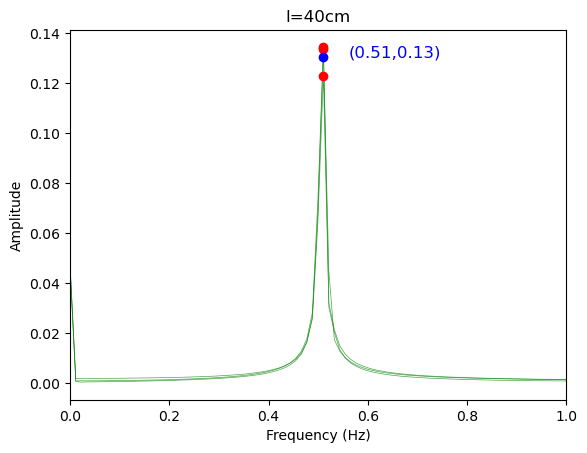

In [26]:
#40CMF IN PHASE

DATA1 = os.path.join(FORTYCMF,'coupled pendula in phase 1 fourier.csv')
DATA2 = os.path.join(FORTYCMF,'coupled pendula in phase 2 fourier.csv')
DATA3 = os.path.join(FORTYCMF,'coupled pendula in phase 3 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3]
favg = sum(maxf)/len(maxf)
print(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg
print(deltap)

plt.title('l=40cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("inphase4f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



0.0


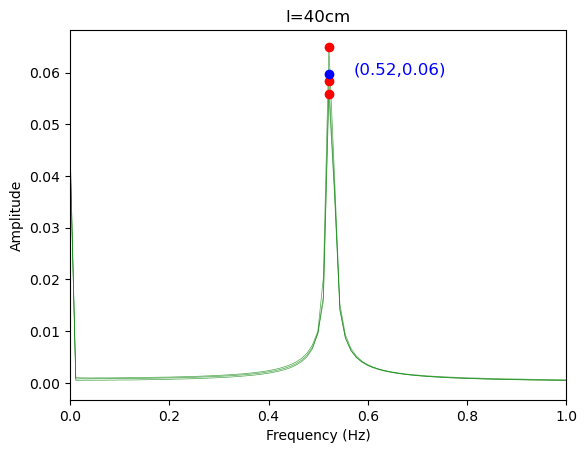

In [27]:
#40CMF OUT OF PHASE

DATA1 = os.path.join(FORTYCMF,'coupled pendula out of phase 1 fourier.csv')
DATA2 = os.path.join(FORTYCMF,'coupled pendula out of phase 2 fourier.csv')
DATA3 = os.path.join(FORTYCMF,'coupled pendula out of phase 3 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg
print(deltap)

plt.title('l=40cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("outphase4f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



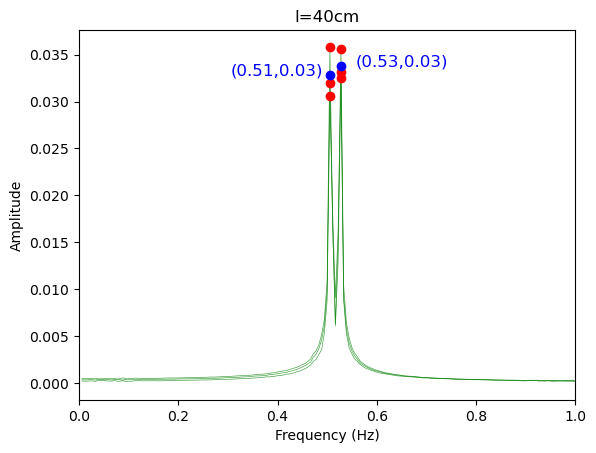

In [28]:
#40CMF BEATMODE

DATA1 = os.path.join(FORTYCMF,'coupled pendula beatmode 1 fourier.csv')
DATA2 = os.path.join(FORTYCMF,'coupled pendula beatmode 2 fourier.csv')
DATA3 = os.path.join(FORTYCMF,'coupled pendula beatmode 3 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df1=df1.iloc[1:]
df2=df2.iloc[1:]
df3=df3.iloc[1:]

df1a = df1.query('0 <= `Frequency (Hz)` <= 0.52').copy()
df2a = df2.query('0 <= `Frequency (Hz)` <= 0.52').copy()
df3a = df3.query('0 <= `Frequency (Hz)` <= 0.52').copy()

df1b = df1.query('0.521 <= `Frequency (Hz)` <= 1').copy()
df2b = df2.query('0.521 <= `Frequency (Hz)` <= 1').copy()
df3b = df3.query('0.521 <= `Frequency (Hz)` <= 1').copy()

maxa1a = df1a['Amplitude'].max()
maxa2a = df2a['Amplitude'].max()
maxa3a = df3a['Amplitude'].max()

maxaa = [maxa1a, maxa2a, maxa3a]
aavga = sum(maxaa)/len(maxaa)

maxf1a = df1a[df1a['Amplitude']==df1a['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2a = df2a[df2a['Amplitude']==df2a['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3a = df3a[df3a['Amplitude']==df3a['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxfa = [maxf1a, maxf2a, maxf3a]
favga = sum(maxfa)/len(maxfa)

maxa1b = df1b['Amplitude'].max()
maxa2b = df2b['Amplitude'].max()
maxa3b = df3b['Amplitude'].max()

maxab = [maxa1b, maxa2b, maxa3b]
aavgb = sum(maxab)/len(maxab)

maxf1b = df1b[df1b['Amplitude']==df1b['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2b = df2b[df2b['Amplitude']==df2b['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3b = df3b[df3b['Amplitude']==df3b['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxfb = [maxf1b, maxf2b, maxf3b]
favgb = sum(maxfb)/len(maxfb)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg

plt.title('l=40cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1a,maxa1a,'ro')
plt.plot(maxf2a,maxa2a,'ro')
plt.plot(maxf3a,maxa3a,'ro')
plt.plot(maxf1b,maxa1b,'ro')
plt.plot(maxf2b,maxa2b,'ro')
plt.plot(maxf3b,maxa3b,'ro')
plt.plot(favga, aavga, 'bo')
plt.plot(favgb, aavgb, 'bo')
plt.annotate(f'({favga:.2f},{aavga:.2f})',
                 xy=(favga, aavga),
                 xytext=(favga-0.2, aavga),
                 fontsize=12, color='blue')
plt.annotate(f'({favgb:.2f},{aavgb:.2f})',
                 xy=(favgb, aavgb),
                 xytext=(favgb+0.03, aavgb),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("bmphase4f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



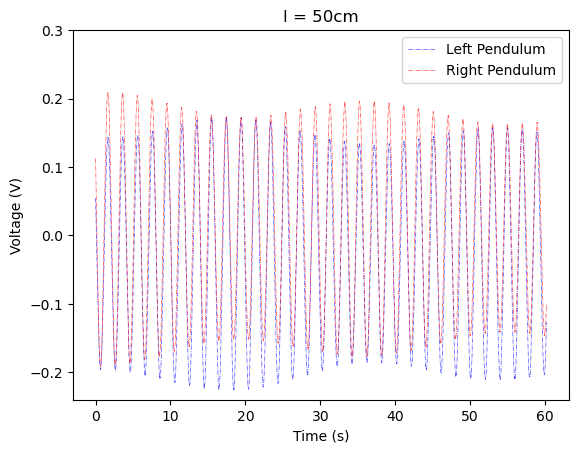

In [29]:
#50CM IN PHASE
DATA1 = os.path.join(FIFTYCM,'coupled pendula in phase 1.csv')
DATA2 = os.path.join(FIFTYCM,'coupled pendula in phase 2.csv')
DATA3 = os.path.join(FIFTYCM,'coupled pendula in phase 3.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df = df3

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l = 50cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.24, 0.3)
plt.savefig("inphase5.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



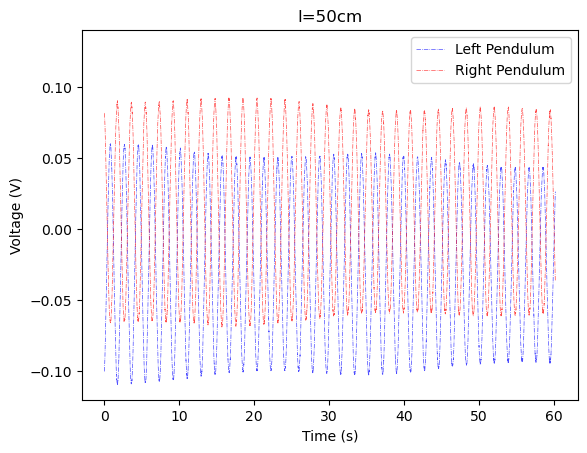

In [30]:
#50CM OUT OF PHASE
DATA1 = os.path.join(FIFTYCM,'coupled pendula out of phase 1.csv')
DATA2 = os.path.join(FIFTYCM,'coupled pendula out of phase 2.csv')
DATA3 = os.path.join(FIFTYCM,'coupled pendula out of phase 3.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df = df1

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l=50cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.12, 0.14)
plt.savefig("outphase5.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



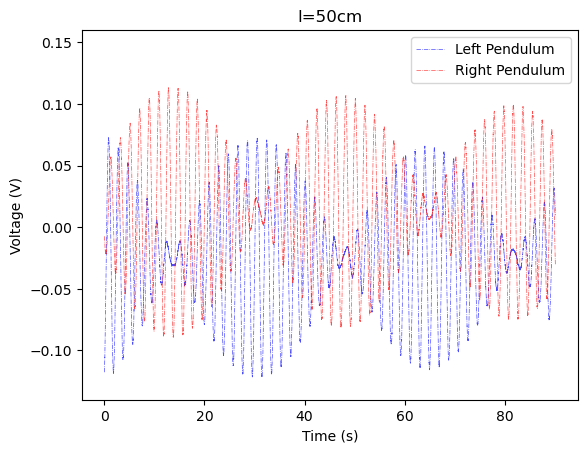

In [31]:
#50CM BEATMODE
DATA1 = os.path.join(FIFTYCM,'coupled pendula beatmode 1.csv')
DATA2 = os.path.join(FIFTYCM,'coupled pendula beatmode 2.csv')
DATA3 = os.path.join(FIFTYCM,'coupled pendula beatmode 3.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df = df1

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l=50cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.14, 0.16)
plt.savefig("bmphase5.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



0.0


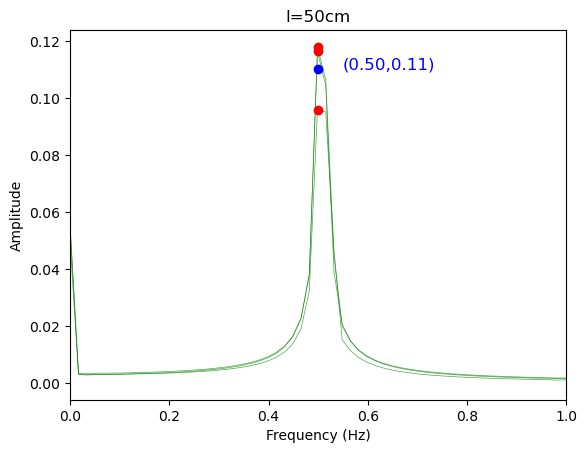

In [32]:
#50CMF IN PHASE

DATA1 = os.path.join(FIFTYCMF,'coupled pendula in phase 1 fourier.csv')
DATA2 = os.path.join(FIFTYCMF,'coupled pendula in phase 2 fourier.csv')
DATA3 = os.path.join(FIFTYCMF,'coupled pendula in phase 3 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg
print(deltap)

plt.title('l=50cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("inphase5f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



0.0


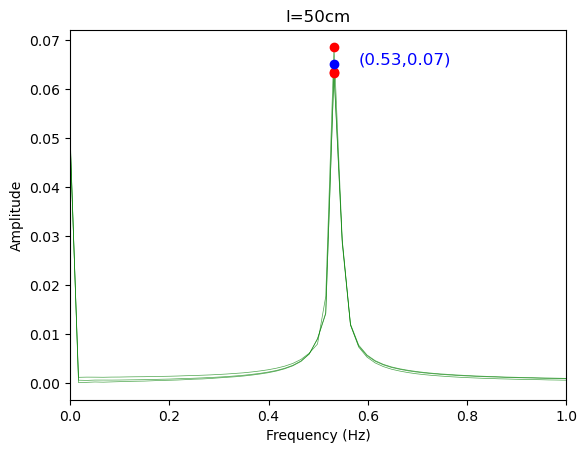

In [33]:
#50CMF OUT OF PHASE

DATA1 = os.path.join(FIFTYCMF,'coupled pendula out of phase 1 fourier.csv')
DATA2 = os.path.join(FIFTYCMF,'coupled pendula out of phase 2 fourier.csv')
DATA3 = os.path.join(FIFTYCMF,'coupled pendula out of phase 3 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg
print(deltap)

plt.title('l=50cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("outphase5f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



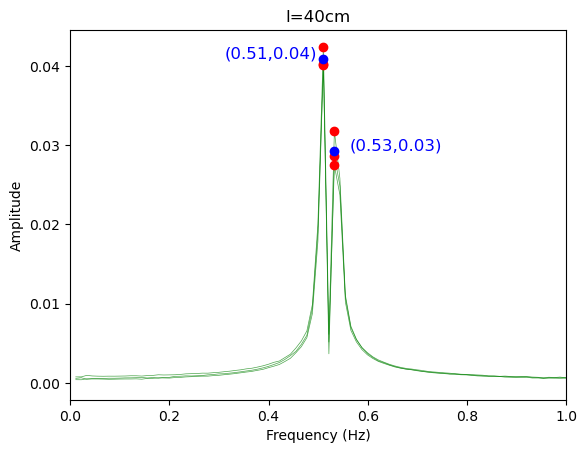

In [34]:
#50CMF BEATMODE

DATA1 = os.path.join(FIFTYCMF,'coupled pendula beatmode 1 fourier.csv')
DATA2 = os.path.join(FIFTYCMF,'coupled pendula beatmode 2 fourier.csv')
DATA3 = os.path.join(FIFTYCMF,'coupled pendula beatmode 3 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df1=df1.iloc[1:]
df2=df2.iloc[1:]
df3=df3.iloc[1:]

df1a = df1.query('0 <= `Frequency (Hz)` <= 0.52').copy()
df2a = df2.query('0 <= `Frequency (Hz)` <= 0.52').copy()
df3a = df3.query('0 <= `Frequency (Hz)` <= 0.52').copy()

df1b = df1.query('0.521 <= `Frequency (Hz)` <= 1').copy()
df2b = df2.query('0.521 <= `Frequency (Hz)` <= 1').copy()
df3b = df3.query('0.521 <= `Frequency (Hz)` <= 1').copy()

maxa1a = df1a['Amplitude'].max()
maxa2a = df2a['Amplitude'].max()
maxa3a = df3a['Amplitude'].max()

maxaa = [maxa1a, maxa2a, maxa3a]
aavga = sum(maxaa)/len(maxaa)

maxf1a = df1a[df1a['Amplitude']==df1a['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2a = df2a[df2a['Amplitude']==df2a['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3a = df3a[df3a['Amplitude']==df3a['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxfa = [maxf1a, maxf2a, maxf3a]
favga = sum(maxfa)/len(maxfa)

maxa1b = df1b['Amplitude'].max()
maxa2b = df2b['Amplitude'].max()
maxa3b = df3b['Amplitude'].max()

maxab = [maxa1b, maxa2b, maxa3b]
aavgb = sum(maxab)/len(maxab)

maxf1b = df1b[df1b['Amplitude']==df1b['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2b = df2b[df2b['Amplitude']==df2b['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3b = df3b[df3b['Amplitude']==df3b['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxfb = [maxf1b, maxf2b, maxf3b]
favgb = sum(maxfb)/len(maxfb)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg

plt.title('l=40cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1a,maxa1a,'ro')
plt.plot(maxf2a,maxa2a,'ro')
plt.plot(maxf3a,maxa3a,'ro')
plt.plot(maxf1b,maxa1b,'ro')
plt.plot(maxf2b,maxa2b,'ro')
plt.plot(maxf3b,maxa3b,'ro')
plt.plot(favga, aavga, 'bo')
plt.plot(favgb, aavgb, 'bo')
plt.annotate(f'({favga:.2f},{aavga:.2f})',
                 xy=(favga, aavga),
                 xytext=(favga-0.2, aavga),
                 fontsize=12, color='blue')
plt.annotate(f'({favgb:.2f},{aavgb:.2f})',
                 xy=(favgb, aavgb),
                 xytext=(favgb+0.03, aavgb),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("bmphase5f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



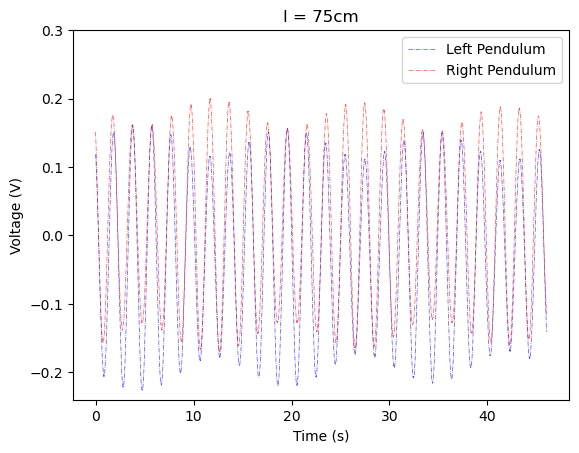

In [35]:
#75CM IN PHASE
DATA1 = os.path.join(SEVENTYFIVECM,'coupled pendula in phase 1.csv')
DATA2 = os.path.join(SEVENTYFIVECM,'coupled pendula in phase 2.csv')
DATA3 = os.path.join(SEVENTYFIVECM,'coupled pendula in phase 3.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df = df3

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l = 75cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.24, 0.3)
plt.savefig("inphase6.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



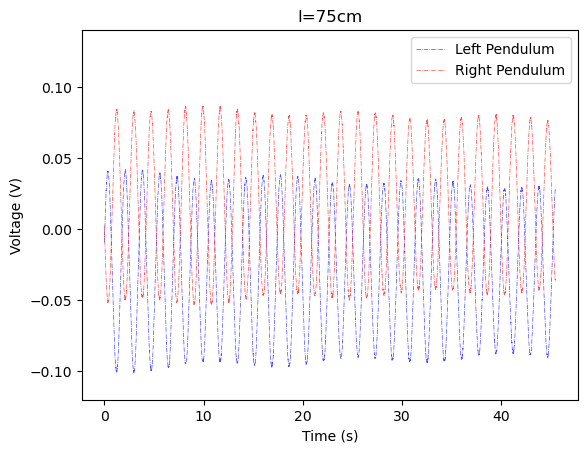

In [36]:
#75CM OUT OF PHASE
DATA1 = os.path.join(SEVENTYFIVECM,'coupled pendula out of phase 1.csv')
DATA2 = os.path.join(SEVENTYFIVECM,'coupled pendula out of phase 2.csv')
DATA3 = os.path.join(SEVENTYFIVECM,'coupled pendula out of phase 3.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df = df1

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l=75cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.12, 0.14)
plt.savefig("outphase6.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()




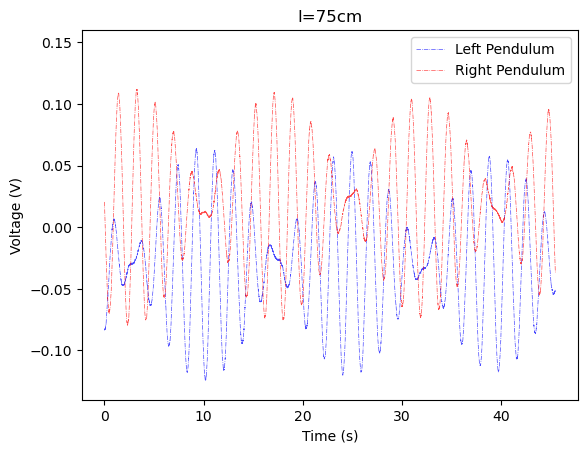

In [37]:
#75CM BEATMODE
DATA1 = os.path.join(SEVENTYFIVECM,'coupled pendula beatmode 1.csv')

df1 = pd.read_csv(DATA1)

df = df1

plt.plot(df['Time (s)'],df[' Voltage 0 (V)'],alpha=0.7,linewidth=0.5,color='blue',linestyle='-.',label='Left Pendulum')
plt.plot(df['Time (s)'],df['Voltage 1 (V)'],alpha=0.7,linewidth=0.5,color='red',linestyle='-.',label='Right Pendulum')

plt.title('l=75cm')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')

plt.ylim(-0.14, 0.16)
plt.savefig("bmphase6.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



0.005952451252494959


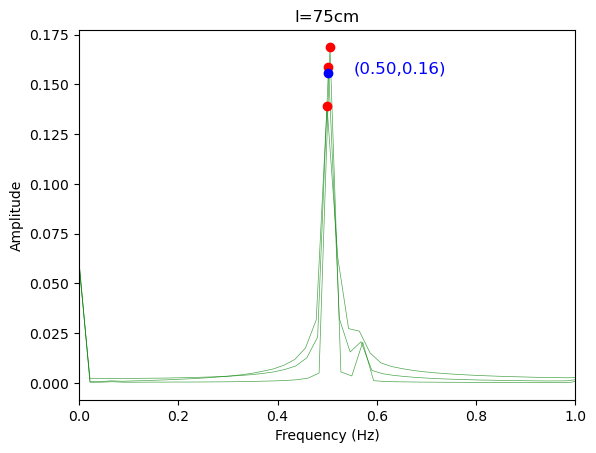

In [38]:
#75CMF IN PHASE

DATA1 = os.path.join(SEVENTYFIVECMF,'coupled pendula in phase 1 fourier.csv')
DATA2 = os.path.join(SEVENTYFIVECMF,'coupled pendula in phase 2 fourier.csv')
DATA3 = os.path.join(SEVENTYFIVECMF,'coupled pendula in phase 3 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg
print(deltap)

plt.title('l=75cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("inphase6f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



0.0059039622146419045


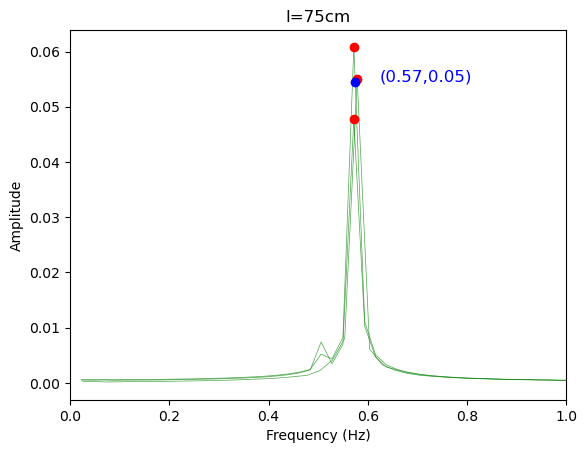

In [39]:
#75CMF OUT OF PHASE

DATA1 = os.path.join(SEVENTYFIVECMF,'coupled pendula out of phase 1 fourier.csv')
DATA2 = os.path.join(SEVENTYFIVECMF,'coupled pendula out of phase 2 fourier.csv')
DATA3 = os.path.join(SEVENTYFIVECMF,'coupled pendula out of phase 3 fourier.csv')

df1 = pd.read_csv(DATA1)
df2 = pd.read_csv(DATA2)
df3 = pd.read_csv(DATA3)

df1=df1.iloc[1:]
df2=df2.iloc[1:]
df3=df3.iloc[1:]

maxa1 = df1['Amplitude'].max()
maxa2 = df2['Amplitude'].max()
maxa3 = df3['Amplitude'].max()

maxa = [maxa1, maxa2, maxa3]
aavg = sum(maxa)/len(maxa)

maxf1 = df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf2 = df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]
maxf3 = df3[df3['Amplitude']==df3['Amplitude'].max()]['Frequency (Hz)'].values[0]

maxf = [maxf1, maxf2, maxf3]
favg = sum(maxf)/len(maxf)

#Uncertainty analysis
delta = (max(maxf)-min(maxf))/2
deltap = delta/favg
print(deltap)

plt.title('l=75cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.plot(df1['Frequency (Hz)'],df1['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df2['Frequency (Hz)'],df2['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(df3['Frequency (Hz)'],df3['Amplitude'],alpha=0.7,linewidth=0.5,color='green')
plt.plot(maxf1,maxa1,'ro')
plt.plot(maxf2,maxa2,'ro')
plt.plot(maxf3,maxa3,'ro')
plt.plot(favg, aavg, 'bo')
plt.annotate(f'({favg:.2f},{aavg:.2f})',
                 xy=(favg, aavg),
                 xytext=(favg+0.05, aavg),
                 fontsize=12, color='blue')

plt.xlim(0,1)
plt.savefig("outphase6f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()



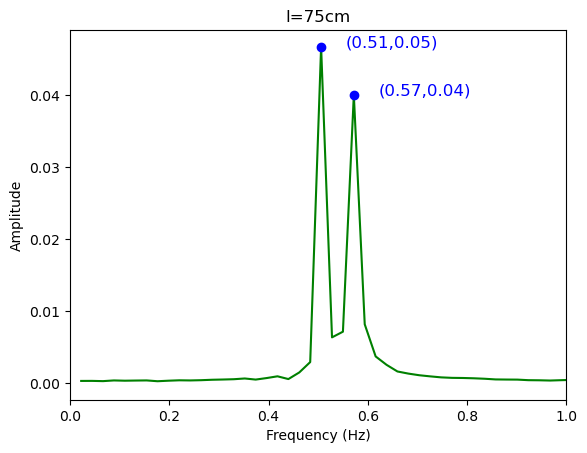

In [40]:
#UNCOUPLED BEATMODE FOURIER
BEATMODEF = os.path.join(SEVENTYFIVECMF, 'coupled pendula beatmode 1 fourier.csv')
df = pd.read_csv(BEATMODEF)

df = df.iloc[1:]

df1 = df.query('0 <= `Frequency (Hz)` <= 0.52').copy()
df2 = df.query('0.521 <= `Frequency (Hz)` <= 1')

plt.plot(df['Frequency (Hz)'], df['Amplitude'],'g')
plt.xlim(0,1)
plt.plot(df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0],df1['Amplitude'].max(),'bo')
plt.plot(df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0],df2['Amplitude'].max(),'bo')
plt.annotate(f'({df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]:.2f},{df1['Amplitude'].max():.2f})',
                 xy=(df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0], df1['Amplitude'].max()),
                 xytext=(df1[df1['Amplitude']==df1['Amplitude'].max()]['Frequency (Hz)'].values[0]+0.05, df1['Amplitude'].max()),
                 fontsize=12, color='blue')
plt.annotate(f'({df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]:.2f},{df2['Amplitude'].max():.2f})',
                 xy=(df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0], df2['Amplitude'].max()),
                 xytext=(df2[df2['Amplitude']==df2['Amplitude'].max()]['Frequency (Hz)'].values[0]+0.05, df2['Amplitude'].max()),
                 fontsize=12, color='blue')

plt.title('l=75cm')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.savefig("bmphase6f.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()